In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.1
training_epochs = 2000

In [3]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [4]:
x1_label1 = np.random.normal(3,1,1000)
x2_label1 = np.random.normal(2,1,1000)
x1_label2 = np.random.normal(7,1,1000)
x2_label2 = np.random.normal(6,1,1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

In [5]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0.,0.,0.], name="w", trainable=True)

In [6]:
y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], feed_dict={X1: x1s, X2: x2s, Y: ys})
        print(epoch, err)
        if abs(err - prev_err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w)
    print(w_val)

0 0.693146
1 0.611264
2 0.60521
3 0.60075
4 0.5964
5 0.592147
6 0.587987
7 0.583917
8 0.579934
9 0.576034
10 0.572213
11 0.56847
12 0.564801
13 0.561202
14 0.557673
15 0.55421
16 0.55081
17 0.547471
18 0.544192
19 0.54097
20 0.537802
21 0.534688
22 0.531625
23 0.528611
24 0.525645
25 0.522725
26 0.51985
27 0.517018
28 0.514228
29 0.511478
30 0.508767
31 0.506095
32 0.503459
33 0.500859
34 0.498293
35 0.495761
36 0.493262
37 0.490794
38 0.488357
39 0.48595
40 0.483572
41 0.481222
42 0.4789
43 0.476605
44 0.474336
45 0.472093
46 0.469874
47 0.46768
48 0.46551
49 0.463362
50 0.461238
51 0.459135
52 0.457054
53 0.454994
54 0.452955
55 0.450936
56 0.448937
57 0.446957
58 0.444996
59 0.443054
60 0.44113
61 0.439224
62 0.437336
63 0.435465
64 0.433611
65 0.431773
66 0.429952
67 0.428147
68 0.426357
69 0.424583
70 0.422825
71 0.421081
72 0.419352
73 0.417637
74 0.415937
75 0.414251
76 0.412579
77 0.41092
78 0.409275
79 0.407643
80 0.406024
81 0.404418
82 0.402824
83 0.401243
84 0.399675
85 0.3

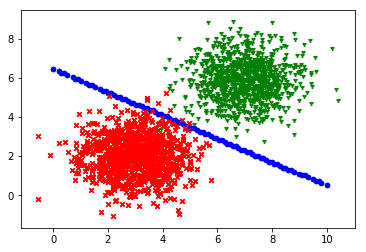

In [15]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test * w_val[2] - x1_test * w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()